# Licence

One-Dimensional Optimization Methods

Copyright (C) 2021 Juan Luis Ruiz Vanegas (juanluisruiz971@comunidad.unam.mx)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.


# Practice I
## Nonlinear Optimization

### Python implementation of the following nonlinear optimization methods

- Exhaustive search
- Dividing intervals in half
- Fibonacci
- Golden section

##### The input data depends on each method and the output of the program should be: Interval in which the optimum is found $([a^∗, b^∗])$ and the number of evaluations of the objective function that were made.

## Excercises:

### 1. (60 points) Using the above methods minimize the following function:

- $f(x) = 0.65 - [\frac{0.75}{1+x^2}] - (0.65 x)
atan(\frac{1}{x})$

In the interval $[0, 3]$. A precision of 0.001 is required.

### Exhaustive search

Input Format

The interval $[a,b]$ and the precision $\epsilon$ in the following format:

- a,b,$\epsilon$

Output Format

$(a,b)$ Interval in which the optimum lies. Both a and b must be printed with a precision of three digits.

$evalF$ Number of evaluations of the objective function f that had to be performed to find the interval.

###  Phase of bounding

Input Format

Starting point $x_0$ and the increment $\Delta$ in the following format:

- $x_0$,$\Delta$

Output Format

$(a,b)$ Interval in which the optimum lies. Both a and b must be printed with a precision of three digits.

$evalF$ Number of evaluations of the objective function f that had to be performed to find the interval.

### Dividing intervals in half

Input Format

The interval $[a,b]$ and the precision $\epsilon$ in the following format:

- a,b,$\epsilon$

Output Format

$(a,b)$ Interval in which the optimum lies. Both a and b must be printed with a precision of three digits.

$evalF$ Number of evaluations of the objective function f that had to be performed to find the interval.

### Fibonacci

Input Format

The interval $[a,b]$ and $n$ (last element of the Fibonacci sequence to be used by the algorithm)

Output Format

$(a,b)$ Interval in which the optimum lies. Both a and b must be printed with a precision of three digits.

$evalF$ Number of evaluations of the objective function f that had to be performed to find the interval.

### Golden section

Input Format

The interval $[a,b]$ and the precision $\epsilon$ in the following format:

- a,b,$\epsilon$

Output Format

$(a,b)$ Interval in which the optimum lies. Both a and b must be printed with a precision of three digits.

$evalF$ Number of evaluations of the objective function f that had to be performed to find the interval.

In [103]:
def f(x):
    return ( (0.65) - ( .75/ (1+x**2))- (0.65*x)* ( math.atan(1/x)) )

##-- Exhaustive_Search --##
def Exhaustive_Search(a,b,epsilon):
    print("Exhaustive Search: ")
    n = 2*(b-a)/epsilon
    x1 = a
    dx = (b-a)/n
    x2 = x1 + dx
    x3 = x2 + dx
    evalF = 0

    while(x1==0 or x2==0 or x3==0):
        x1 = x2
        x2 = x3
        x3 = x2+dx

    while (x3 <= b):
        evalF +=1
        if (f(x1) >= f(x2) <= f(x3)):
            print("\t-The optimum point, with an accuracy of {3}, is located in the interval ({0:.3f},{1:.3f})\n\t-Evaluations:{2}".format(x1, x3, evalF+2,epsilon))

        x1 = x2
        x2 = x3
        x3 = x2 + dx
        
        
##-- Phase_of_Bounding --##    
def Phase_of_Bounding(x0,delta):
        print("\nPhase of Bounding")
        continuar = True
        contador = 3
        x_m = f(x0 - abs(delta))
        x = f(x0)
        x_M = f(x0 + abs(delta))
        
        if x_m >= x >= x_M:
            delta = abs (delta) #Delta es positivo
            x1 = x0 + delta

        else:
            if x_m <= x <= x_M :
                delta = -abs(delta) #Delta es negativo
                x1 = x0 + delta
            else:
                continuar = False
                print("\t-Optimum precision bounding with a delta of {3}, is located in the interval ({0:.3f},{1:.3f})  starting at point {4}\n\t-Evaluations:{2}".format(x0- abs(delta), x0+abs(delta),contador+k,delta,x0))
        
        if (continuar):
            k = 1
            x_k = x1
            x_k_1 = x_k + (2**k)*delta
            f_x_k = f(x_k)

            while( f(x_k_1) < f_x_k ):
                k += 1
                x_k__1 = x_k
                x_k = x_k_1
                x_k_1 = x_k + (2**k)*delta

            print("\t-Optimum precision bounding with a delta of {3}, is located in the interval ({0:.3f},{1:.3f})  starting at point {4}\n\t-Evaluations:{2}".format(x_k__1,x_k_1,contador+k,delta,x0))

##-- Dividing_Intervals_In_Half --#
def Dividing_Intervals_In_Half(a,b,epsilon):   
    print("\nDividing Intervals in half:")
    xm = (a+b)/2
    L = b - a
    contador = 1

    while (abs(L) > epsilon):
        x1 = a+L/4
        x2 = b-L/4
        if f(x1)< f(xm):
            b = xm
            xm = x1

        else:
            if f(x2)<f(xm):
                a = xm
                xm = x2
            else:
                a = x1
                b = x2

        L = b-a
        contador += 2

    print("\t-The optimum point, with an accuracy of {3}, is located in the interval ({0:.3f},{1:.3f})\n\t-Evaluations:{2}".format(a,b,contador,epsilon))

##-- Fibonacci_Search --##
def fibonacci(n):
   if n == 1 or n == 0:
       return 1
   else:
       return(fibonacci(n-1) + fibonacci(n-2))
def Fibonacci_Search(a,b,n):
    print("\nFibonacciSearch:")
    k = 2
    L = b-a

    while (k<=n):
        L_estrella= (fibonacci(n-k)/fibonacci(n))*L
        x1 = a + L_estrella
        x2 = b - L_estrella

        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
        k = k+1

    print("\t-The optimum point is located in the interval ({0:.3f},{1:.3f})\n\t-Evaluations:{2}".format(a,b,n))

##-- Golden section --##
def f_a(w, a, b):
    x = w*(b-a)+a
    return( f(x), x )

def Golden_Section(a,b,epsilon):
    print("\nGolden Section:")
    aw, bw, Lw = 0,1,1
    evalF = 1
    while ( Lw > epsilon/(b-a) ):    
        w1, w2 = aw + 0.618*Lw, bw - 0.618*Lw
        f_w1, f_w2 = f_a(w1,a,b)[0], f_a(w2,a,b)[0]

        if ( f_w1 < f_w2 ):
            aw = w2
        else:
            bw = w1
            intervalo = 2
        Lw = bw - aw    
        evalF += 1
    #Normalization
    print("\t-The optimum point, with an accuracy of {3}, is located in the interval ({0:.3f},{1:.3f})\n\t-Evaluations:{2}".format(f_a(aw,a,b)[1],f_a(aw,a,b)[1],evalF,epsilon))

if __name__=="__main__":
    a, b, epsilon = 0, 3, 0.001
    Exhaustive_Search(a,b,epsilon)
    
    x0, delta = 0.4, 1e-5
    Phase_of_Bounding(x0, delta)
    
    Dividing_Intervals_In_Half(a,b,epsilon)
    
    n=17
    Fibonacci_Search(a,b,n)
    Golden_Section(a,b,epsilon)

Exhaustive Search: 
	-The optimum point, with an accuracy of 0.001, is located in the interval (0.481,0.482)
	-Evaluations:963

Phase of Bounding
	-Optimum precision bounding with a delta of 1e-05, is located in the interval (0.482,0.728)  starting at point 0.4
	-Evaluations:17

Dividing Intervals in half:
	-The optimum point, with an accuracy of 0.001, is located in the interval (0.480,0.481)
	-Evaluations:25

FibonacciSearch:
	-The optimum point is located in the interval (0.481,0.482)
	-Evaluations:17

Golden Section:
	-The optimum point, with an accuracy of 0.001, is located in the interval (0.481,0.481)
	-Evaluations:18


### 3. Plot $f(x)$ in the interval $[0,3]$

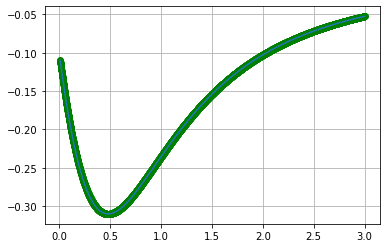

In [76]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return ( (0.65) - ( .75/ (1+x**2))- (0.65*x)* ( math.atan(1/x)) )

vecfunc = np.vectorize(f)

d = np.arange(0.01, 3.0, 0.001)
T = vecfunc(d)
plt.plot (d, T, 'go', d, T)
plt.grid()
plt.show()

### 4. Indicate which method is the most efficient and explain why.
> The most efficient method was the Golden Section method, because although it performed one more evaluation of the objective function with respect to the Fibonacci Search method (18 to 17), in the Golden Section method it is not necessary to calculate the last element of the Fibonacci sequence and it does not use recursive methods.